In [2]:
import pandas as pd
df1=pd.read_csv("ROC_content_based_data.csv")
df2=pd.read_csv("ROC_collaborative_data.csv")
df3=pd.read_csv("ROC_hybrid_data.csv")

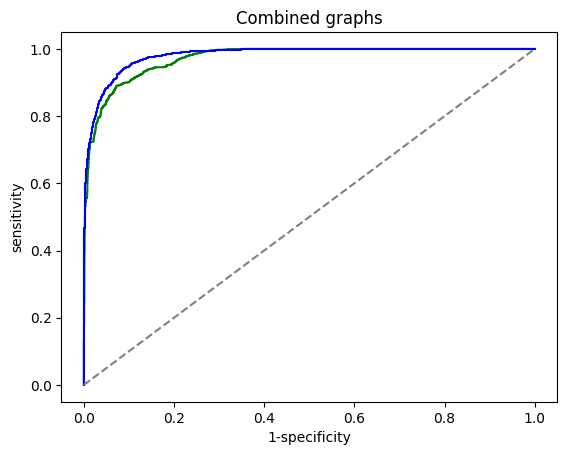

In [3]:
import matplotlib.pyplot as plt
# from sklearn.metrics import auc
# fig, ax = plt.subplots()
fig, ax = plt.subplots()

ax.plot(df1.x, df1.y, color='green')
ax.plot(df2.x, df2.y, color='red')
ax.plot(df3.x, df3.y, color='blue')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel('1-specificity')
ax.set_ylabel('sensitivity')

ax.set_title('Combined graphs')
plt.savefig('ROC_combined.png', dpi=300, bbox_inches='tight')
plt.show()

Plot saved as 'ROC_combined_final.png'


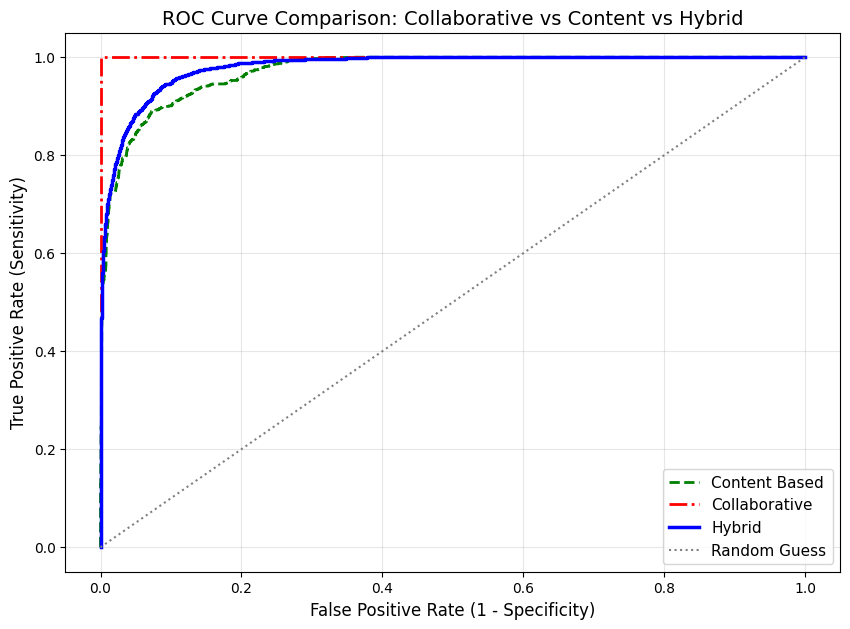

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the Data
# Read the CSV files generated by each model's testing phase
try:
    df_content = pd.read_csv("ROC_content_based_data.csv")
    df_collab = pd.read_csv("ROC_collaborative_data.csv")
    df_hybrid = pd.read_csv("ROC_hybrid_data.csv")
except FileNotFoundError as e:
    print(f"Error: Could not find file {e.filename}. Please run the respective testing notebook first.")
    exit()

# 2. Setup the Plot
plt.figure(figsize=(10, 7))

# 3. Plot each model
# Content Based - Green Dashed Line
plt.plot(df_content['x'], df_content['y'], 
         color='green', linestyle='--', linewidth=2, label='Content Based')

# Collaborative - Red Dash-Dot Line
plt.plot(df_collab['x'], df_collab['y'], 
         color='red', linestyle='-.', linewidth=2, label='Collaborative')

# Hybrid - Blue Solid Line (Main focus)
plt.plot(df_hybrid['x'], df_hybrid['y'], 
         color='blue', linewidth=2.5, label='Hybrid')

# 4. Add Reference Line (Random Guess)
plt.plot([0, 1], [0, 1], linestyle=':', color='gray', label='Random Guess')

# 5. Add Labels and Title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve Comparison: Collaborative vs Content vs Hybrid', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)

# 6. Save and Display
plt.savefig('ROC_combined_final.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'ROC_combined_final.png'")
plt.show()

Plot saved successfully as 'ROC_Collaborative_Separate.png'


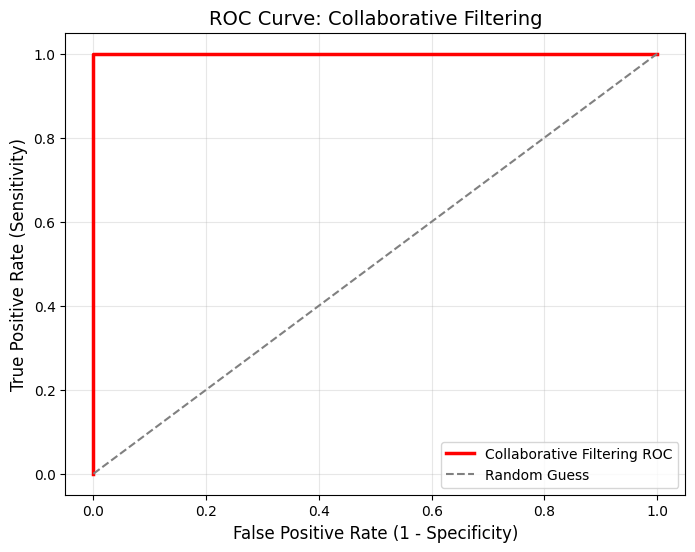

Plot saved successfully as 'ROC_Content_Based_Separate.png'


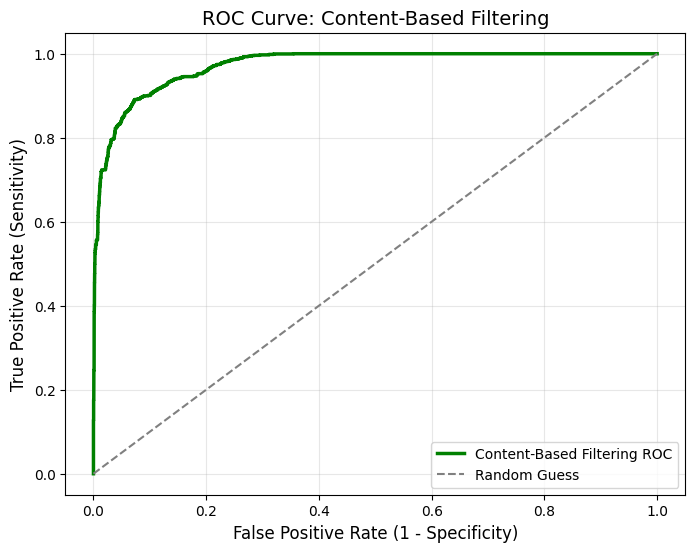

Plot saved successfully as 'ROC_Hybrid_Separate.png'


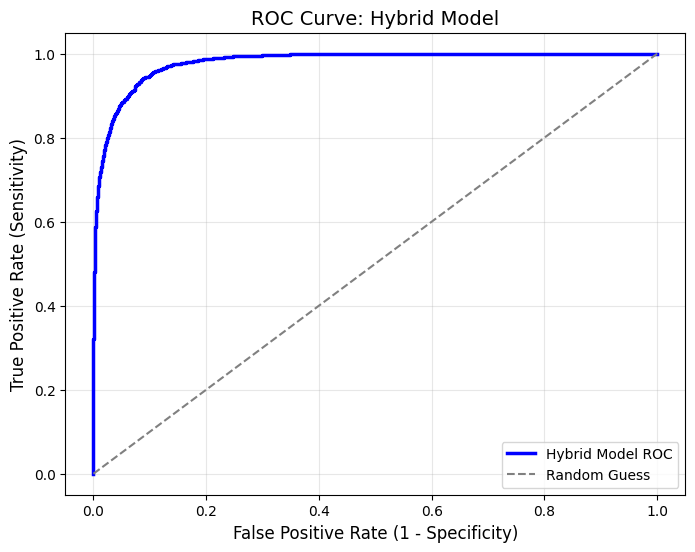

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to plot a single ROC curve
def plot_single_roc(filename, model_name, line_color, output_filename):
    """
    Reads ROC data from a CSV and plots it separately.
    """
    if not os.path.exists(filename):
        print(f"Skipping {model_name}: File '{filename}' not found.")
        return

    try:
        # Read the data
        df = pd.read_csv(filename)
        
        # Create a new figure
        plt.figure(figsize=(8, 6))
        
        # Plot the ROC curve
        plt.plot(df['x'], df['y'], color=line_color, linewidth=2.5, label=f'{model_name} ROC')
        
        # Add diagonal reference line (Random Guess)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
        
        # Labels and Title
        plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
        plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
        plt.title(f'ROC Curve: {model_name}', fontsize=14)
        plt.legend(loc='lower right')
        plt.grid(alpha=0.3)
        
        # Save and Show
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        print(f"Plot saved successfully as '{output_filename}'")
        plt.show()
        
    except Exception as e:
        print(f"Error plotting {model_name}: {e}")

# ---------------------------------------------------------
# GENERATE SEPARATE PLOTS
# ---------------------------------------------------------

# 1. Collaborative Filtering Plot
plot_single_roc(
    filename="ROC_collaborative_data.csv", 
    model_name="Collaborative Filtering", 
    line_color="red", 
    output_filename="ROC_Collaborative_Separate.png"
)

# 2. Content-Based Filtering Plot
plot_single_roc(
    filename="ROC_content_based_data.csv", 
    model_name="Content-Based Filtering", 
    line_color="green", 
    output_filename="ROC_Content_Based_Separate.png"
)

# 3. Hybrid Model Plot
plot_single_roc(
    filename="ROC_hybrid_data.csv", 
    model_name="Hybrid Model", 
    line_color="blue", 
    output_filename="ROC_Hybrid_Separate.png"
)